In [1]:
import pandas as pd

data = pd.read_csv('wine.csv')

In [2]:
data.head()

country                                        description  \
0     Italy  Aromas include tropical fruit, broom, brimston...   
1  Portugal  This is ripe and fruity, a wine that is smooth...   
2        US  Tart and snappy, the flavors of lime flesh and...   
3        US  Pineapple rind, lemon pith and orange blossom ...   
4        US  Much like the regular bottling from 2012, this...   

                          designation  points  price           province  \
0                        Vulkà Bianco      87    NaN  Sicily & Sardinia   
1                            Avidagos      87   15.0              Douro   
2                                 NaN      87   14.0             Oregon   
3                Reserve Late Harvest      87   13.0           Michigan   
4  Vintner's Reserve Wild Child Block      87   65.0             Oregon   

              region_1           region_2         taster_name  \
0                 Etna                NaN       Kerin O’Keefe   
1                  NaN                NaN          Roger Voss   
2    Willamette Valley  Willamette Valley        Paul Gregutt   
3  Lake Michigan Shore                NaN  Alexander Peartree   
4    Willamette Valley  Willamette Valley        Paul Gregutt   

  taster_twitter_handle                                              title  \
0          @kerinokeefe                  Nicosia 2013 Vulkà Bianco  (Etna)   
1            @vossroger      Quinta dos Avidagos 2011 Avidagos Red (Douro)   
2           @paulgwine       Rainstorm 2013 Pinot Gris (Willamette Valley)   
3                   NaN  St. Julian 2013 Reserve Late Harvest Riesling ...   
4           @paulgwine   Sweet Cheeks 2012 Vintner's Reserve Wild Child...   

          variety               winery  
0     White Blend              Nicosia  
1  Portuguese Red  Quinta dos Avidagos  
2      Pinot Gris            Rainstorm  
3        Riesling           St. Julian  
4      Pinot Noir         Sweet Cheeks

In [3]:
data['taster_name'].nunique()

19

In [4]:
data['price'].max()

3300.0

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB


In [6]:
dub_discr= data[data.duplicated()]
print(dub_discr.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9983 entries, 2408 to 129913
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                9979 non-null   object 
 1   description            9983 non-null   object 
 2   designation            7063 non-null   object 
 3   points                 9983 non-null   int64  
 4   price                  9382 non-null   float64
 5   province               9979 non-null   object 
 6   region_1               8296 non-null   object 
 7   region_2               3742 non-null   object 
 8   taster_name            8656 non-null   object 
 9   taster_twitter_handle  8216 non-null   object 
 10  title                  9983 non-null   object 
 11  variety                9983 non-null   object 
 12  winery                 9983 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB
None


In [7]:
data = data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119988 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                119929 non-null  object 
 1   description            119988 non-null  object 
 2   designation            85443 non-null   object 
 3   points                 119988 non-null  int64  
 4   price                  111593 non-null  float64
 5   province               119929 non-null  object 
 6   region_1               100428 non-null  object 
 7   region_2               46769 non-null   object 
 8   taster_name            95071 non-null   object 
 9   taster_twitter_handle  90542 non-null   object 
 10  title                  119988 non-null  object 
 11  variety                119987 non-null  object 
 12  winery                 119988 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.8+ MB


In [8]:
cols_null_percent = data.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null)

region_2                 61.021936
designation              28.790379
taster_twitter_handle    24.540787
taster_name              20.766243
region_1                 16.301630
price                     6.996533
country                   0.049172
province                  0.049172
variety                   0.000833
dtype: float64

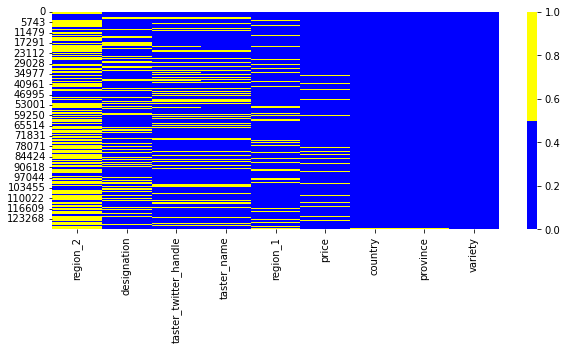

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
colors = ['blue', 'yellow'] 
fig = plt.figure(figsize=(10, 4))
cols = cols_with_null.index
ax = sns.heatmap(
    data[cols].isnull(),
    cmap=sns.color_palette(colors),
)

In [10]:
#создаем копию исходной таблицы
drop_data = data.copy()
#задаем минимальный порог: вычисляем 70% от числа строк
thresh = drop_data.shape[0]*0.7
#удаляем столбцы, в которых более 30% (100-70) пропусков
drop_data = drop_data.dropna(how='any', thresh=thresh, axis=1)
#удаляем записи, в которых есть хотя бы 1 пропуск
drop_data = drop_data.dropna(how='any', axis=0)
#отображаем результирующую долю пропусков
drop_data.isnull().mean()

country                  0.0
description              0.0
designation              0.0
points                   0.0
price                    0.0
province                 0.0
region_1                 0.0
taster_name              0.0
taster_twitter_handle    0.0
title                    0.0
variety                  0.0
winery                   0.0
dtype: float64

In [11]:
drop_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47673 entries, 4 to 129970
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                47673 non-null  object 
 1   description            47673 non-null  object 
 2   designation            47673 non-null  object 
 3   points                 47673 non-null  int64  
 4   price                  47673 non-null  float64
 5   province               47673 non-null  object 
 6   region_1               47673 non-null  object 
 7   taster_name            47673 non-null  object 
 8   taster_twitter_handle  47673 non-null  object 
 9   title                  47673 non-null  object 
 10  variety                47673 non-null  object 
 11  winery                 47673 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 4.7+ MB


In [12]:
from pandas_profiling import ProfileReport

df = pd.read_csv('wine.csv')

In [13]:
profile = ProfileReport(df, title="Wine Pandas Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [14]:
import sweetviz as sv

In [15]:
report = sv.analyze(data)
report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [16]:
import dtale

d = dtale.show(df)
d

/Users/sev/Library/Python/3.8/lib/python/site-packages/dtale/views.py:746: FutureWarning:

['country', 'designation', 'province', 'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'variety'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.



In [17]:
data = pd.read_csv('wine_cleared.csv')

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            129971 non-null  object 
 4   points                 129971 non-null  int64  
 5   price                  129971 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               129971 non-null  object 
 8   taster_name            129971 non-null  object 
 9   taster_twitter_handle  129971 non-null  object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 12.9+ MB


In [19]:
data['price'].min()

4.0

In [20]:
import statistics

In [21]:
statistics.mean(data['price'])

35.363389129985535

In [22]:
data['price'].mean()

35.363389129985535

In [23]:
 statistics.median(data['price'])

28.0

In [24]:
data['price'].median()

28.0

In [25]:
statistics.mode(data['price'])

35.363389129985535

In [26]:
data['price'].mode()

0    35.363389
Name: price, dtype: float64

In [27]:
data.corr()

Unnamed: 0    points     price
Unnamed: 0    1.000000  0.007124  0.004652
points        0.007124  1.000000  0.402137
price         0.004652  0.402137  1.000000

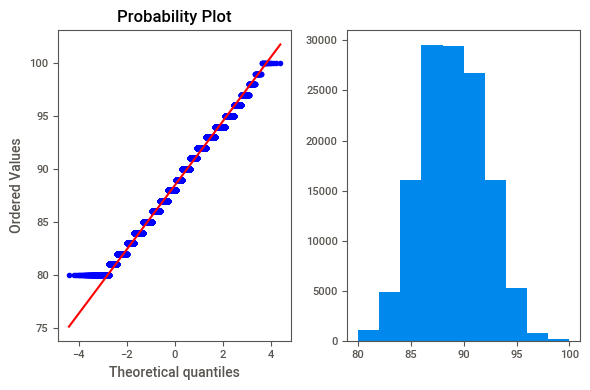

In [28]:
import matplotlib.pyplot as plt # библиотека визуализации
from scipy import stats # библиотека для расчетов

plt.subplot(1, 2, 1) # задаем сетку рисунка количество строк и столбцов
stats.probplot(data['points'], plot=plt) # qq plot

plt.subplot(1, 2, 2) # располагаем второй рисунок рядом
plt.hist(data['points']) # гистограмма распределения признака

plt.tight_layout() # чтобы графики не наезжали другу на друга, используем tight_layout

plt.show() # просмотр графика

In [29]:
data.corr('kendall')

Unnamed: 0    points     price
Unnamed: 0    1.000000  0.006536  0.002533
points        0.006536  1.000000  0.433498
price         0.002533  0.433498  1.000000

In [30]:
from sklearn.metrics import matthews_corrcoef

from sklearn.metrics import matthews_corrcoef

x = [+1, -1, +1, +1] # список значений признака х
y = [+1, +1, +1, -1] # список значений признака y

matthews_corrcoef(x, y) # рассчитаем коэффициент корреляции Мэтьюса

-0.3333333333333333

In [31]:
data = pd.read_csv('model.csv')

In [32]:
data.corr()

Year     Waist      Hips    Height    Weight       BMI  \
Year       1.000000  0.292518 -0.281576  0.284482 -0.010753  0.025309   
Waist      0.292518  1.000000  0.283060  0.372637  0.452704  0.136549   
Hips      -0.281576  0.283060  1.000000  0.228054  0.541836  0.211395   
Height     0.284482  0.372637  0.228054  1.000000  0.706569 -0.037934   
Weight    -0.010753  0.452704  0.541836  0.706569  1.000000  0.212701   
BMI        0.025309  0.136549  0.211395 -0.037934  0.212701  1.000000   
Waist/Hip  0.458945  0.742284 -0.422412  0.198754  0.067543 -0.010173   

           Waist/Hip  
Year        0.458945  
Waist       0.742284  
Hips       -0.422412  
Height      0.198754  
Weight      0.067543  
BMI        -0.010173  
Waist/Hip   1.000000

<AxesSubplot: >

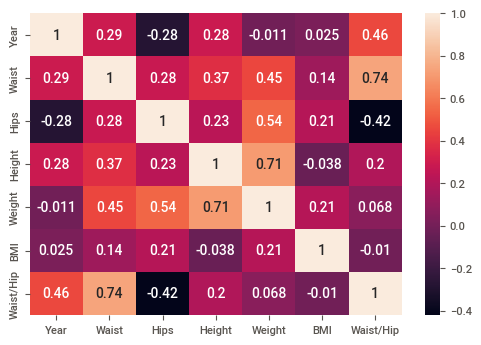

In [33]:
import seaborn as sns
sns.heatmap(data.corr(), annot = True)

<AxesSubplot: xlabel='Waist/Hip', ylabel='Waist'>

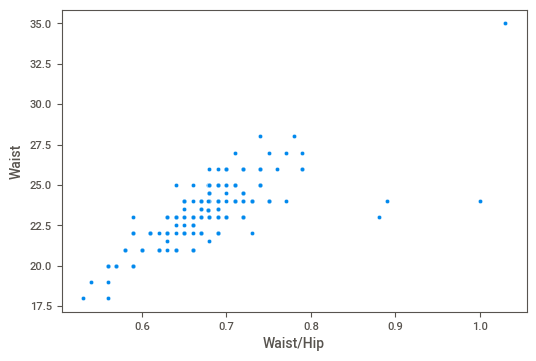

In [34]:
sns.scatterplot(data=data, x="Waist/Hip", y="Waist")

<AxesSubplot: xlabel='Weight', ylabel='Year'>

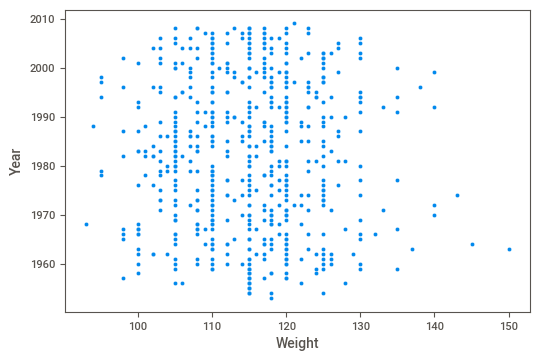

In [35]:
sns.scatterplot(data=data, x="Weight", y="Year")

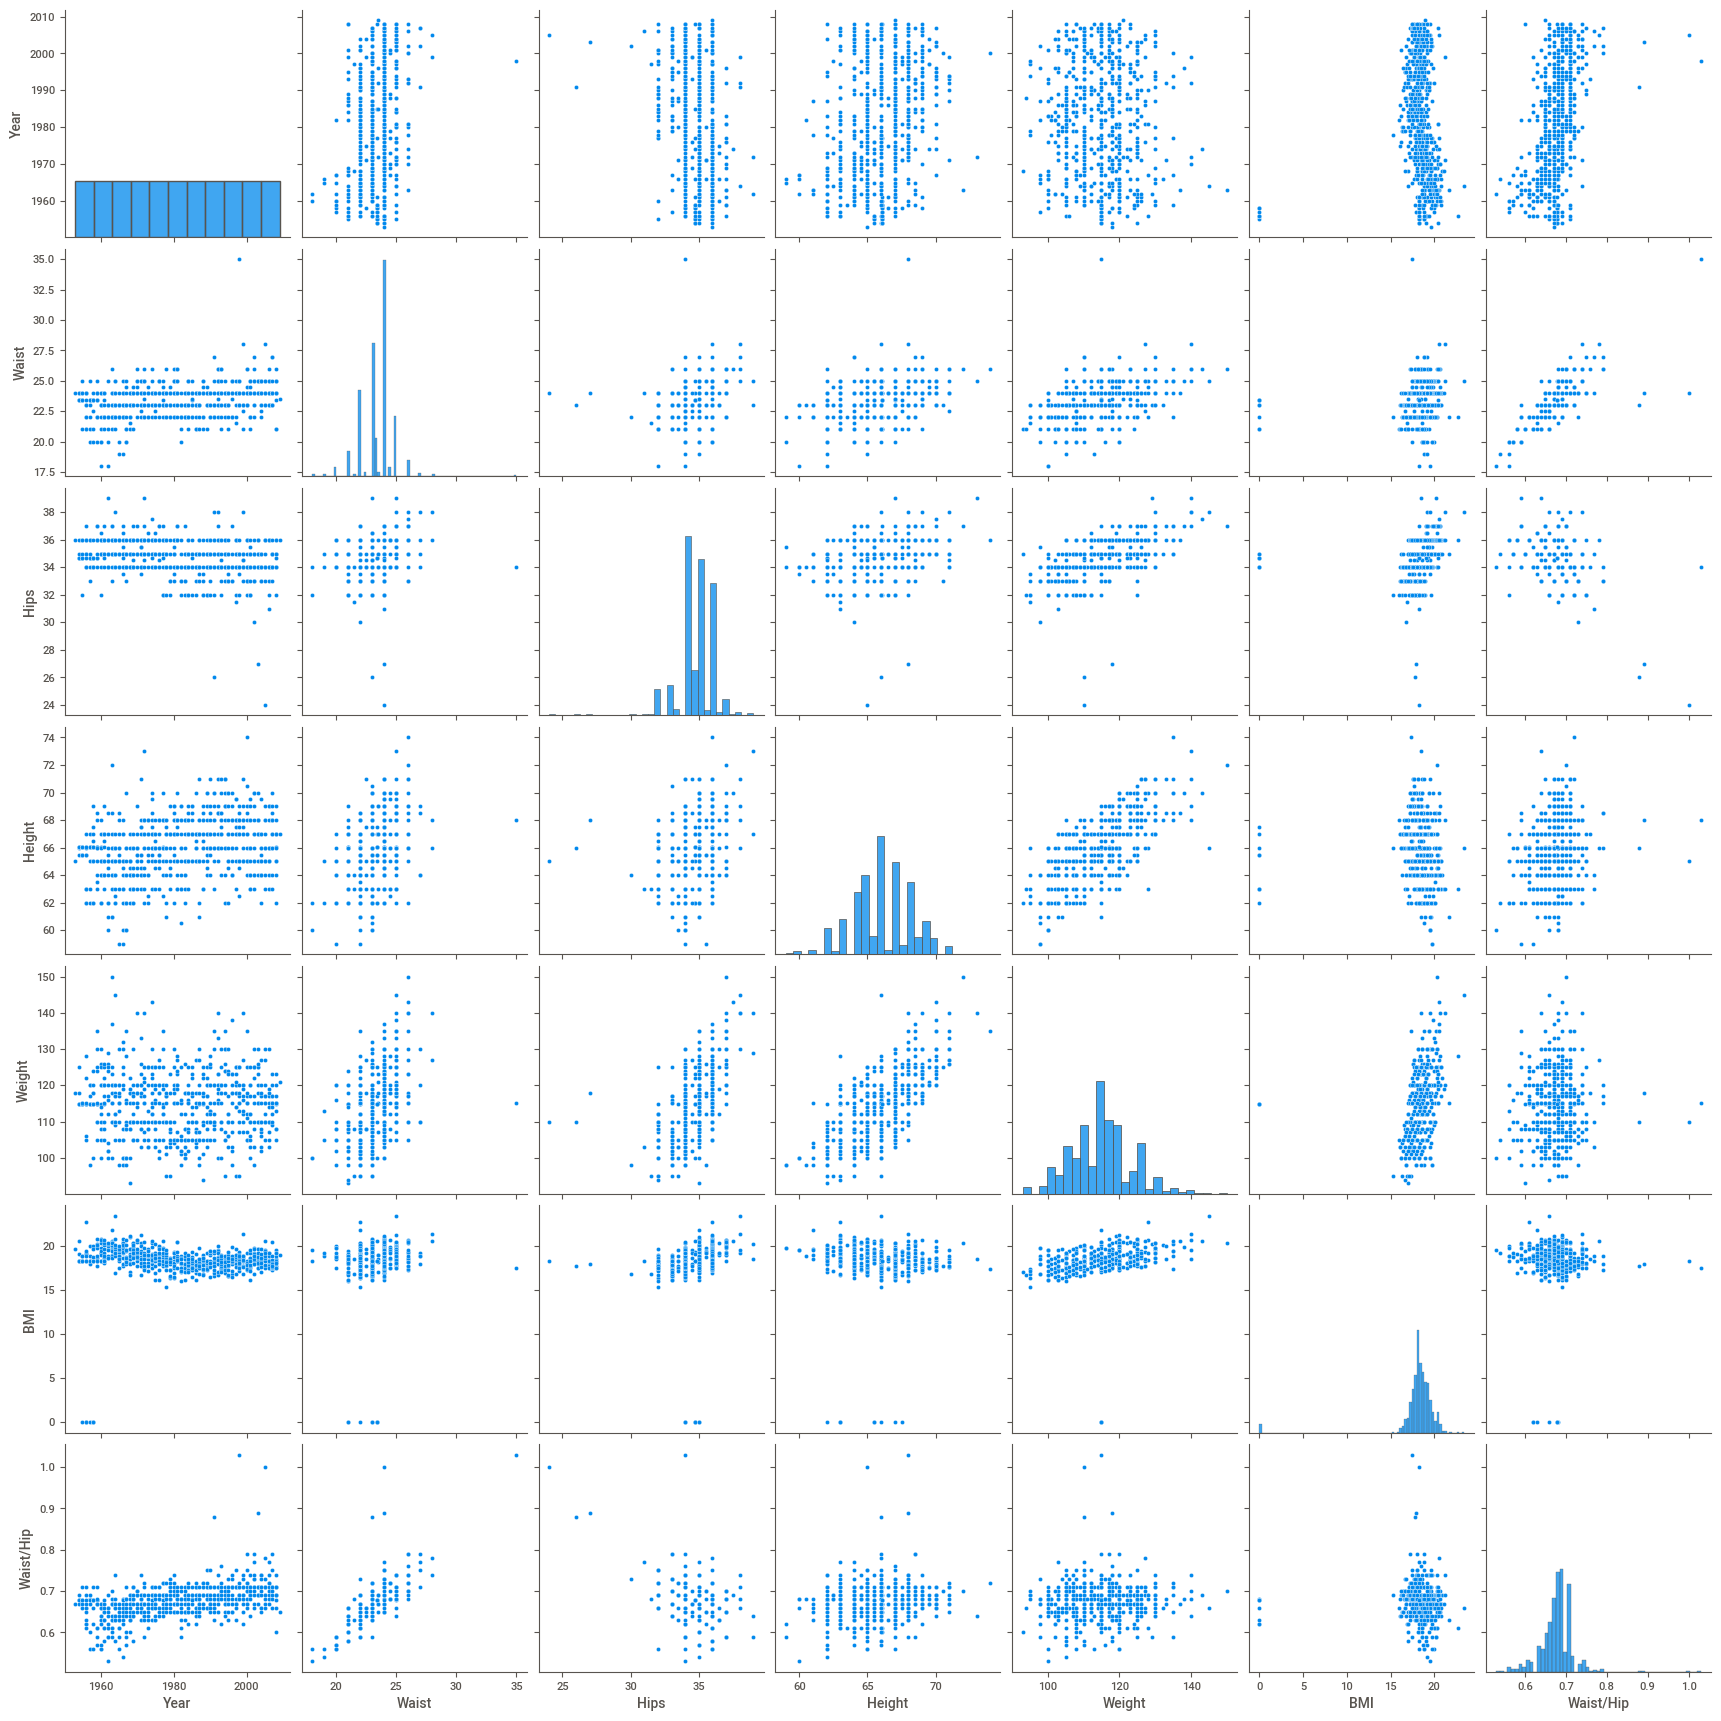

In [36]:
sns.pairplot(data)

In [37]:
data.corr()


Year     Waist      Hips    Height    Weight       BMI  \
Year       1.000000  0.292518 -0.281576  0.284482 -0.010753  0.025309   
Waist      0.292518  1.000000  0.283060  0.372637  0.452704  0.136549   
Hips      -0.281576  0.283060  1.000000  0.228054  0.541836  0.211395   
Height     0.284482  0.372637  0.228054  1.000000  0.706569 -0.037934   
Weight    -0.010753  0.452704  0.541836  0.706569  1.000000  0.212701   
BMI        0.025309  0.136549  0.211395 -0.037934  0.212701  1.000000   
Waist/Hip  0.458945  0.742284 -0.422412  0.198754  0.067543 -0.010173   

           Waist/Hip  
Year        0.458945  
Waist       0.742284  
Hips       -0.422412  
Height      0.198754  
Weight      0.067543  
BMI        -0.010173  
Waist/Hip   1.000000

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662 entries, 0 to 661
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Month      662 non-null    object 
 1   Year       662 non-null    int64  
 2   Waist      662 non-null    float64
 3   Hips       662 non-null    float64
 4   Height     662 non-null    float64
 5   Weight     662 non-null    float64
 6   BMI        662 non-null    float64
 7   Waist/Hip  662 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 41.5+ KB


In [39]:
statistics.mean(data['Weight'])

114.93606557377049

In [40]:
statistics.mean(data['Height'])

66.05725806451613

In [41]:
data = pd.read_csv('wine_cleared.csv')
data['price_round'] = data['price'].round().astype(int)

In [42]:
data.head()

Unnamed: 0   country                                        description  \
0           0     Italy  Aromas include tropical fruit, broom, brimston...   
1           1  Portugal  This is ripe and fruity, a wine that is smooth...   
2           2        US  Tart and snappy, the flavors of lime flesh and...   
3           3        US  Pineapple rind, lemon pith and orange blossom ...   
4           4        US  Much like the regular bottling from 2012, this...   

                          designation  points      price           province  \
0                        Vulkà Bianco      87  35.363389  Sicily & Sardinia   
1                            Avidagos      87  15.000000              Douro   
2                             unknown      87  14.000000             Oregon   
3                Reserve Late Harvest      87  13.000000           Michigan   
4  Vintner's Reserve Wild Child Block      87  65.000000             Oregon   

              region_1         taster_name taster_twitter_handle  \
0                 Etna       Kerin O’Keefe          @kerinokeefe   
1              unknown          Roger Voss            @vossroger   
2    Willamette Valley        Paul Gregutt           @paulgwine    
3  Lake Michigan Shore  Alexander Peartree               unknown   
4    Willamette Valley        Paul Gregutt           @paulgwine    

                                               title         variety  \
0                  Nicosia 2013 Vulkà Bianco  (Etna)     White Blend   
1      Quinta dos Avidagos 2011 Avidagos Red (Douro)  Portuguese Red   
2      Rainstorm 2013 Pinot Gris (Willamette Valley)      Pinot Gris   
3  St. Julian 2013 Reserve Late Harvest Riesling ...        Riesling   
4  Sweet Cheeks 2012 Vintner's Reserve Wild Child...      Pinot Noir   

                winery  price_round  
0              Nicosia           35  
1  Quinta dos Avidagos           15  
2            Rainstorm           14  
3           St. Julian           13  
4         Sweet Cheeks           65

In [43]:
regex = '\d{4}' # регулярное выражение для нахождения чисел
data['year'] = data['title'].str.findall(regex).str.get(0)

In [44]:
data['is_usa'] = data['country'].apply(lambda x: 1 if x == 'US' else 0)

In [45]:
data['is_france'] = data['country'].apply(lambda x: 1 if x == 'France' else 0)
data['is_italy'] = data['country'].apply(lambda x: 1 if x == 'Italy' else 0)

In [46]:
data['is_france'].sum()

22093

In [47]:
data['is_italy'].sum()

19540

In [48]:
# преобразуем признак year в объект datetime для удобного сравнения дат
data['year'] = pd.to_datetime(data['year'], errors='coerce')

# для сравнения используем год, заполняем значения признака old_wine, где год вина меньше 2010
data['old_wine'] = data['year'].apply(lambda x: 1 if x.year < 2010 else 0) 
data['old_wine'].sum()

39765

In [49]:
regex = '\((.*?)\)'
data['locality'] = data['title'].str.findall(regex).str.get(0)

In [50]:
country_population = pd.read_csv('country_population.csv', sep=';')

country_population

country     population
0               China  1,411,778,724
1               India  1,386,584,581
2                  US    333,022,386
3           Indonesia    271,350,000
4            Pakistan    225,200,000
..                ...            ...
236              Niue          1,549
237           Tokelau          1,501
238      Vatican City            825
239     Cocos Islands            573
240  Pitcairn Islands             40

[241 rows x 2 columns]

In [51]:
country_population.loc[country_population['country'] == 'Italy']

country  population
24   Italy  59,097,904

In [52]:
data.join(country_population.set_index('country'), on='country')

Unnamed: 0   country  \
0                0     Italy   
1                1  Portugal   
2                2        US   
3                3        US   
4                4        US   
...            ...       ...   
129966      129966   Germany   
129967      129967        US   
129968      129968    France   
129969      129969    France   
129970      129970    France   

                                              description  \
0       Aromas include tropical fruit, broom, brimston...   
1       This is ripe and fruity, a wine that is smooth...   
2       Tart and snappy, the flavors of lime flesh and...   
3       Pineapple rind, lemon pith and orange blossom ...   
4       Much like the regular bottling from 2012, this...   
...                                                   ...   
129966  Notes of honeysuckle and cantaloupe sweeten th...   
129967  Citation is given as much as a decade of bottl...   
129968  Well-drained gravel soil gives this wine its c...   
129969  A dry style of Pinot Gris, this is crisp with ...   
129970  Big, rich and off-dry, this is powered by inte...   

                                   designation  points      price  \
0                                 Vulkà Bianco      87  35.363389   
1                                     Avidagos      87  15.000000   
2                                      unknown      87  14.000000   
3                         Reserve Late Harvest      87  13.000000   
4           Vintner's Reserve Wild Child Block      87  65.000000   
...                                        ...     ...        ...   
129966  Brauneberger Juffer-Sonnenuhr Spätlese      90  28.000000   
129967                                 unknown      90  75.000000   
129968                                   Kritt      90  30.000000   
129969                                 unknown      90  32.000000   
129970           Lieu-dit Harth Cuvée Caroline      90  21.000000   

                 province             region_1         taster_name  \
0       Sicily & Sardinia                 Etna       Kerin O’Keefe   
1                   Douro              unknown          Roger Voss   
2                  Oregon    Willamette Valley        Paul Gregutt   
3                Michigan  Lake Michigan Shore  Alexander Peartree   
4                  Oregon    Willamette Valley        Paul Gregutt   
...                   ...                  ...                 ...   
129966              Mosel              unknown  Anna Lee C. Iijima   
129967             Oregon               Oregon        Paul Gregutt   
129968             Alsace               Alsace          Roger Voss   
129969             Alsace               Alsace          Roger Voss   
129970             Alsace               Alsace          Roger Voss   

       taster_twitter_handle  ...         variety  \
0               @kerinokeefe  ...     White Blend   
1                 @vossroger  ...  Portuguese Red   
2                @paulgwine   ...      Pinot Gris   
3                    unknown  ...        Riesling   
4                @paulgwine   ...      Pinot Noir   
...                      ...  ...             ...   
129966               unknown  ...        Riesling   
129967           @paulgwine   ...      Pinot Noir   
129968            @vossroger  ...  Gewürztraminer   
129969            @vossroger  ...      Pinot Gris   
129970            @vossroger  ...  Gewürztraminer   

                                          winery price_round       year  \
0                                        Nicosia          35 2013-01-01   
1                            Quinta dos Avidagos          15 2011-01-01   
2                                      Rainstorm          14 2013-01-01   
3                                     St. Julian          13 2013-01-01   
4                                   Sweet Cheeks          65 2012-01-01   
...                                          ...         ...        ...   
129966  Dr. H. Thanisch (Erben Müller-Burggraef)          

In [53]:
country_area = pd.read_csv('country_area.csv', sep=';')
country_area

country         area
0          Russia  17075400.00
1          Canada   9984670.00
2           China   9596960.00
3              US   9372610.00
4          Brazil   8547000.00
..            ...          ...
188    San Marino        61.00
189        Tuvalu        26.00
190         Nauru        21.00
191        Monaco         2.00
192  Vatican City         0.44

[193 rows x 2 columns]

In [54]:
data.join(country_area.set_index('country'), on='country')

Unnamed: 0   country  \
0                0     Italy   
1                1  Portugal   
2                2        US   
3                3        US   
4                4        US   
...            ...       ...   
129966      129966   Germany   
129967      129967        US   
129968      129968    France   
129969      129969    France   
129970      129970    France   

                                              description  \
0       Aromas include tropical fruit, broom, brimston...   
1       This is ripe and fruity, a wine that is smooth...   
2       Tart and snappy, the flavors of lime flesh and...   
3       Pineapple rind, lemon pith and orange blossom ...   
4       Much like the regular bottling from 2012, this...   
...                                                   ...   
129966  Notes of honeysuckle and cantaloupe sweeten th...   
129967  Citation is given as much as a decade of bottl...   
129968  Well-drained gravel soil gives this wine its c...   
129969  A dry style of Pinot Gris, this is crisp with ...   
129970  Big, rich and off-dry, this is powered by inte...   

                                   designation  points      price  \
0                                 Vulkà Bianco      87  35.363389   
1                                     Avidagos      87  15.000000   
2                                      unknown      87  14.000000   
3                         Reserve Late Harvest      87  13.000000   
4           Vintner's Reserve Wild Child Block      87  65.000000   
...                                        ...     ...        ...   
129966  Brauneberger Juffer-Sonnenuhr Spätlese      90  28.000000   
129967                                 unknown      90  75.000000   
129968                                   Kritt      90  30.000000   
129969                                 unknown      90  32.000000   
129970           Lieu-dit Harth Cuvée Caroline      90  21.000000   

                 province             region_1         taster_name  \
0       Sicily & Sardinia                 Etna       Kerin O’Keefe   
1                   Douro              unknown          Roger Voss   
2                  Oregon    Willamette Valley        Paul Gregutt   
3                Michigan  Lake Michigan Shore  Alexander Peartree   
4                  Oregon    Willamette Valley        Paul Gregutt   
...                   ...                  ...                 ...   
129966              Mosel              unknown  Anna Lee C. Iijima   
129967             Oregon               Oregon        Paul Gregutt   
129968             Alsace               Alsace          Roger Voss   
129969             Alsace               Alsace          Roger Voss   
129970             Alsace               Alsace          Roger Voss   

       taster_twitter_handle  ...         variety  \
0               @kerinokeefe  ...     White Blend   
1                 @vossroger  ...  Portuguese Red   
2                @paulgwine   ...      Pinot Gris   
3                    unknown  ...        Riesling   
4                @paulgwine   ...      Pinot Noir   
...                      ...  ...             ...   
129966               unknown  ...        Riesling   
129967           @paulgwine   ...      Pinot Noir   
129968            @vossroger  ...  Gewürztraminer   
129969            @vossroger  ...      Pinot Gris   
129970            @vossroger  ...  Gewürztraminer   

                                          winery price_round       year  \
0                                        Nicosia          35 2013-01-01   
1                            Quinta dos Avidagos          15 2011-01-01   
2                                      Rainstorm          14 2013-01-01   
3                                     St. Julian          13 2013-01-01   
4                                   Sweet Cheeks          65 2012-01-01   
...                                          ...         ...        ...   
129966  Dr. H. Thanisch (Erben Müller-Burggraef)          

In [55]:
data.loc[data['title'] == 'Gård 2014 Grand Klasse Reserve Lawrence Vineyards Viognier (Columbia Valley (WA))']

Unnamed: 0 country                                        description  \
94          94      US  Barrel notes are prominent, with aromas of Cre...   

                                designation  points  price    province  \
94  Grand Klasse Reserve Lawrence Vineyards      88   22.0  Washington   

                region_1       taster_name taster_twitter_handle  \
94  Columbia Valley (WA)  Sean P. Sullivan         @wawinereport   

                                                title   variety winery  \
94  Gård 2014 Grand Klasse Reserve Lawrence Vineya...  Viognier   Gård   

    price_round       year  is_usa  is_france  is_italy  old_wine  \
94           22 2014-01-01       1          0         0         0   

               locality  
94  Columbia Valley (WA

In [56]:
# инициализируем информацию о звонках
calls_list = [
    [460, '2013-12-17 04:55:39', '2013-12-17 04:55:44', '2013-12-17 04:55:45'],
    [12, '2013-12-16 20:03:20', '2013-12-16 20:03:22', '2013-12-16 20:07:13'],
    [56, '2013-12-16 20:03:20', '2013-12-16 20:03:20', '2013-12-16 20:05:04'],
    [980, '2013-12-16 20:03:20','2013-12-16 20:03:27', '2013-12-16 20:03:29'],
    [396, '2013-12-16 20:08:27', '2013-12-16 20:08:28','2013-12-16 20:12:03'],
    [449, '2013-12-16 20:03:20', '2013-12-16 20:03:25','2013-12-16 20:05:00'],
    [397, '2013-12-16 20:08:25', '2013-12-16 20:08:27', '2013-12-16 20:09:59'],
    [398, '2013-12-16 20:01:23', '2013-12-16 20:01:23', '2013-12-16 20:04:58'],
    [452, '2013-12-16 20:03:20', '2013-12-16 20:03:21','2013-12-16 20:04:55'],
    [440, '2013-12-16 20:03:20', '2013-12-16 20:04:26', '2013-12-16 20:04:32']
]

calls = pd.DataFrame(calls_list, columns = ['client_id',  'agent_date', 'created_at' ,'end_date'])

# преобразовываем признаки в формат datetime для удобной работы

calls['agent_date'] = pd.to_datetime(calls['agent_date'])
calls['created_at'] = pd.to_datetime(calls['created_at'])
calls['end_date'] = pd.to_datetime(calls['end_date'])

calls

client_id          agent_date          created_at            end_date
0        460 2013-12-17 04:55:39 2013-12-17 04:55:44 2013-12-17 04:55:45
1         12 2013-12-16 20:03:20 2013-12-16 20:03:22 2013-12-16 20:07:13
2         56 2013-12-16 20:03:20 2013-12-16 20:03:20 2013-12-16 20:05:04
3        980 2013-12-16 20:03:20 2013-12-16 20:03:27 2013-12-16 20:03:29
4        396 2013-12-16 20:08:27 2013-12-16 20:08:28 2013-12-16 20:12:03
5        449 2013-12-16 20:03:20 2013-12-16 20:03:25 2013-12-16 20:05:00
6        397 2013-12-16 20:08:25 2013-12-16 20:08:27 2013-12-16 20:09:59
7        398 2013-12-16 20:01:23 2013-12-16 20:01:23 2013-12-16 20:04:58
8        452 2013-12-16 20:03:20 2013-12-16 20:03:21 2013-12-16 20:04:55
9        440 2013-12-16 20:03:20 2013-12-16 20:04:26 2013-12-16 20:04:32

In [57]:
calls['duration'] = (calls['end_date'] - calls['created_at']).dt.seconds
calls

client_id          agent_date          created_at            end_date  \
0        460 2013-12-17 04:55:39 2013-12-17 04:55:44 2013-12-17 04:55:45   
1         12 2013-12-16 20:03:20 2013-12-16 20:03:22 2013-12-16 20:07:13   
2         56 2013-12-16 20:03:20 2013-12-16 20:03:20 2013-12-16 20:05:04   
3        980 2013-12-16 20:03:20 2013-12-16 20:03:27 2013-12-16 20:03:29   
4        396 2013-12-16 20:08:27 2013-12-16 20:08:28 2013-12-16 20:12:03   
5        449 2013-12-16 20:03:20 2013-12-16 20:03:25 2013-12-16 20:05:00   
6        397 2013-12-16 20:08:25 2013-12-16 20:08:27 2013-12-16 20:09:59   
7        398 2013-12-16 20:01:23 2013-12-16 20:01:23 2013-12-16 20:04:58   
8        452 2013-12-16 20:03:20 2013-12-16 20:03:21 2013-12-16 20:04:55   
9        440 2013-12-16 20:03:20 2013-12-16 20:04:26 2013-12-16 20:04:32   

   duration  
0         1  
1       231  
2       104  
3         2  
4       215  
5        95  
6        92  
7       215  
8        94  
9         6

In [58]:
calls['time_connection'] = (calls['created_at'] - calls['agent_date']).dt.seconds
calls

client_id          agent_date          created_at            end_date  \
0        460 2013-12-17 04:55:39 2013-12-17 04:55:44 2013-12-17 04:55:45   
1         12 2013-12-16 20:03:20 2013-12-16 20:03:22 2013-12-16 20:07:13   
2         56 2013-12-16 20:03:20 2013-12-16 20:03:20 2013-12-16 20:05:04   
3        980 2013-12-16 20:03:20 2013-12-16 20:03:27 2013-12-16 20:03:29   
4        396 2013-12-16 20:08:27 2013-12-16 20:08:28 2013-12-16 20:12:03   
5        449 2013-12-16 20:03:20 2013-12-16 20:03:25 2013-12-16 20:05:00   
6        397 2013-12-16 20:08:25 2013-12-16 20:08:27 2013-12-16 20:09:59   
7        398 2013-12-16 20:01:23 2013-12-16 20:01:23 2013-12-16 20:04:58   
8        452 2013-12-16 20:03:20 2013-12-16 20:03:21 2013-12-16 20:04:55   
9        440 2013-12-16 20:03:20 2013-12-16 20:04:26 2013-12-16 20:04:32   

   duration  time_connection  
0         1                5  
1       231                2  
2       104                0  
3         2                7  
4       215                1  
5        95                5  
6        92                2  
7       215                0  
8        94                1  
9         6               66

In [59]:
calls['time_connection'].sum()

89

In [60]:
import numpy as np


In [61]:
calls['is_connection'] = np.where(calls['duration'] >10,1,0)
calls

client_id          agent_date          created_at            end_date  \
0        460 2013-12-17 04:55:39 2013-12-17 04:55:44 2013-12-17 04:55:45   
1         12 2013-12-16 20:03:20 2013-12-16 20:03:22 2013-12-16 20:07:13   
2         56 2013-12-16 20:03:20 2013-12-16 20:03:20 2013-12-16 20:05:04   
3        980 2013-12-16 20:03:20 2013-12-16 20:03:27 2013-12-16 20:03:29   
4        396 2013-12-16 20:08:27 2013-12-16 20:08:28 2013-12-16 20:12:03   
5        449 2013-12-16 20:03:20 2013-12-16 20:03:25 2013-12-16 20:05:00   
6        397 2013-12-16 20:08:25 2013-12-16 20:08:27 2013-12-16 20:09:59   
7        398 2013-12-16 20:01:23 2013-12-16 20:01:23 2013-12-16 20:04:58   
8        452 2013-12-16 20:03:20 2013-12-16 20:03:21 2013-12-16 20:04:55   
9        440 2013-12-16 20:03:20 2013-12-16 20:04:26 2013-12-16 20:04:32   

   duration  time_connection  is_connection  
0         1                5              0  
1       231                2              1  
2       104                0              1  
3         2                7              0  
4       215                1              1  
5        95                5              1  
6        92                2              1  
7       215                0              1  
8        94                1              1  
9         6               66              0

In [62]:
calls['is_connection'].sum()

7

In [63]:
calls['time_diff'] = (calls['end_date'] - calls['agent_date']).dt.seconds
calls

client_id          agent_date          created_at            end_date  \
0        460 2013-12-17 04:55:39 2013-12-17 04:55:44 2013-12-17 04:55:45   
1         12 2013-12-16 20:03:20 2013-12-16 20:03:22 2013-12-16 20:07:13   
2         56 2013-12-16 20:03:20 2013-12-16 20:03:20 2013-12-16 20:05:04   
3        980 2013-12-16 20:03:20 2013-12-16 20:03:27 2013-12-16 20:03:29   
4        396 2013-12-16 20:08:27 2013-12-16 20:08:28 2013-12-16 20:12:03   
5        449 2013-12-16 20:03:20 2013-12-16 20:03:25 2013-12-16 20:05:00   
6        397 2013-12-16 20:08:25 2013-12-16 20:08:27 2013-12-16 20:09:59   
7        398 2013-12-16 20:01:23 2013-12-16 20:01:23 2013-12-16 20:04:58   
8        452 2013-12-16 20:03:20 2013-12-16 20:03:21 2013-12-16 20:04:55   
9        440 2013-12-16 20:03:20 2013-12-16 20:04:26 2013-12-16 20:04:32   

   duration  time_connection  is_connection  time_diff  
0         1                5              0          6  
1       231                2              1        233  
2       104                0              1        104  
3         2                7              0          9  
4       215                1              1        216  
5        95                5              1        100  
6        92                2              1         94  
7       215                0              1        215  
8        94                1              1         95  
9         6               66              0         72

In [64]:
calls['time_diff'].sum()

1144

In [65]:
calls = calls.drop(columns=['agent_date', 'created_at' ,'end_date'], axis=1)

In [66]:
from datetime import datetime, timedelta

In [67]:

data['years_diff']=(pd.to_datetime('2022-01-12') - data['year']).dt.days

In [68]:
data['years_diff'].max()

98627.0

In [69]:
import category_encoders as ce

In [70]:
# инициализируем информацию об одежде
clothing_list = [
    ['xxs', 'dress'],
    ['xxs', 'skirt'],
    ['xs', 'dress'],
    ['s', 'skirt'],
    ['m', 'dress'],
    ['l', 'shirt'],
    ['s', 'coat'],
    ['m', 'coat'],
    ['xxl', 'shirt'],
    ['l', 'dress']
]

clothing = pd.DataFrame(clothing_list, columns = ['size',  'type'])
clothing

size   type
0  xxs  dress
1  xxs  skirt
2   xs  dress
3    s  skirt
4    m  dress
5    l  shirt
6    s   coat
7    m   coat
8  xxl  shirt
9    l  dress

In [71]:
ord_encoder = ce.OrdinalEncoder()
data_bin = ord_encoder.fit_transform(clothing[['size', 'type']])
clothing = pd.concat([clothing, data_bin], axis=1)

clothing

size   type  size  type
0   xxs  dress     1     1
1   xxs  skirt     1     2
2    xs  dress     2     1
3     s  skirt     3     2
4     m  dress     4     1
5     l  shirt     5     3
6     s   coat     3     4
7     m   coat     4     4
8   xxl  shirt     6     3
9     l  dress     5     1

In [72]:
ord_encoder = ce.OrdinalEncoder(cols=['year'])
year_col = ord_encoder.fit_transform(data['year'])
data = pd.concat([data, year_col], axis=1)

In [73]:
data

Unnamed: 0   country  \
0                0     Italy   
1                1  Portugal   
2                2        US   
3                3        US   
4                4        US   
...            ...       ...   
129966      129966   Germany   
129967      129967        US   
129968      129968    France   
129969      129969    France   
129970      129970    France   

                                              description  \
0       Aromas include tropical fruit, broom, brimston...   
1       This is ripe and fruity, a wine that is smooth...   
2       Tart and snappy, the flavors of lime flesh and...   
3       Pineapple rind, lemon pith and orange blossom ...   
4       Much like the regular bottling from 2012, this...   
...                                                   ...   
129966  Notes of honeysuckle and cantaloupe sweeten th...   
129967  Citation is given as much as a decade of bottl...   
129968  Well-drained gravel soil gives this wine its c...   
129969  A dry style of Pinot Gris, this is crisp with ...   
129970  Big, rich and off-dry, this is powered by inte...   

                                   designation  points      price  \
0                                 Vulkà Bianco      87  35.363389   
1                                     Avidagos      87  15.000000   
2                                      unknown      87  14.000000   
3                         Reserve Late Harvest      87  13.000000   
4           Vintner's Reserve Wild Child Block      87  65.000000   
...                                        ...     ...        ...   
129966  Brauneberger Juffer-Sonnenuhr Spätlese      90  28.000000   
129967                                 unknown      90  75.000000   
129968                                   Kritt      90  30.000000   
129969                                 unknown      90  32.000000   
129970           Lieu-dit Harth Cuvée Caroline      90  21.000000   

                 province             region_1         taster_name  \
0       Sicily & Sardinia                 Etna       Kerin O’Keefe   
1                   Douro              unknown          Roger Voss   
2                  Oregon    Willamette Valley        Paul Gregutt   
3                Michigan  Lake Michigan Shore  Alexander Peartree   
4                  Oregon    Willamette Valley        Paul Gregutt   
...                   ...                  ...                 ...   
129966              Mosel              unknown  Anna Lee C. Iijima   
129967             Oregon               Oregon        Paul Gregutt   
129968             Alsace               Alsace          Roger Voss   
129969             Alsace               Alsace          Roger Voss   
129970             Alsace               Alsace          Roger Voss   

       taster_twitter_handle  ...                                    winery  \
0               @kerinokeefe  ...                                   Nicosia   
1                 @vossroger  ...                       Quinta dos Avidagos   
2                @paulgwine   ...                                 Rainstorm   
3                    unknown  ...                                St. Julian   
4                @paulgwine   ...                              Sweet Cheeks   
...                      ...  ...                                       ...   
129966               unknown  ...  Dr. H. Thanisch (Erben Müller-Burggraef)   
129967           @paulgwine   ...                                  Citation   
129968            @vossroger  ...                           Domaine Gresser   
129969            @vossroger  ...                      Domaine Marcel Deiss   
129970            @vossroger  ...                          Domaine Schoffit   

       price_round       year  is_usa is_france  is_italy  old_wine  \
0               35 2013-01-01       0         0         1         0   
1               15 2011-01-01       0         0         0         0   
2               14 2013-01-01       1         0         0 

In [74]:
encoder = ce.OneHotEncoder(cols=['type']) # указываем столбец для кодирования
type_bin = encoder.fit_transform(clothing['type'])
clothing = pd.concat([clothing, type_bin], axis=1)
clothing

AttributeError: 'DataFrame' object has no attribute 'unique'

In [ ]:
encoder = ce.OneHotEncoder(cols=['taster_name'])
type_bin = encoder.fit_transform(data['taster_name'])
data = pd.concat([data, type_bin], axis=1)

data

Unnamed: 0   country  \
0                0     Italy   
1                1  Portugal   
2                2        US   
3                3        US   
4                4        US   
...            ...       ...   
129966      129966   Germany   
129967      129967        US   
129968      129968    France   
129969      129969    France   
129970      129970    France   

                                              description  \
0       Aromas include tropical fruit, broom, brimston...   
1       This is ripe and fruity, a wine that is smooth...   
2       Tart and snappy, the flavors of lime flesh and...   
3       Pineapple rind, lemon pith and orange blossom ...   
4       Much like the regular bottling from 2012, this...   
...                                                   ...   
129966  Notes of honeysuckle and cantaloupe sweeten th...   
129967  Citation is given as much as a decade of bottl...   
129968  Well-drained gravel soil gives this wine its c...   
129969  A dry style of Pinot Gris, this is crisp with ...   
129970  Big, rich and off-dry, this is powered by inte...   

                                   designation  points      price  \
0                                 Vulkà Bianco      87  35.363389   
1                                     Avidagos      87  15.000000   
2                                      unknown      87  14.000000   
3                         Reserve Late Harvest      87  13.000000   
4           Vintner's Reserve Wild Child Block      87  65.000000   
...                                        ...     ...        ...   
129966  Brauneberger Juffer-Sonnenuhr Spätlese      90  28.000000   
129967                                 unknown      90  75.000000   
129968                                   Kritt      90  30.000000   
129969                                 unknown      90  32.000000   
129970           Lieu-dit Harth Cuvée Caroline      90  21.000000   

                 province             region_1         taster_name  \
0       Sicily & Sardinia                 Etna       Kerin O’Keefe   
1                   Douro              unknown          Roger Voss   
2                  Oregon    Willamette Valley        Paul Gregutt   
3                Michigan  Lake Michigan Shore  Alexander Peartree   
4                  Oregon    Willamette Valley        Paul Gregutt   
...                   ...                  ...                 ...   
129966              Mosel              unknown  Anna Lee C. Iijima   
129967             Oregon               Oregon        Paul Gregutt   
129968             Alsace               Alsace          Roger Voss   
129969             Alsace               Alsace          Roger Voss   
129970             Alsace               Alsace          Roger Voss   

       taster_twitter_handle  ... taster_name_11 taster_name_12  \
0               @kerinokeefe  ...              0              0   
1                 @vossroger  ...              0              0   
2                @paulgwine   ...              0              0   
3                    unknown  ...              0              0   
4                @paulgwine   ...              0              0   
...                      ...  ...            ...            ...   
129966               unknown  ...              0              0   
129967           @paulgwine   ...              0              0   
129968            @vossroger  ...              0              0   
129969            @vossroger  ...              0              0   
129970            @vossroger  ...              0              0   

       taster_name_13  taster_name_14 taster_name_15  taster_name_16  \
0                   0               0              0               0   
1                   0               0              0               0   
2                   0               0              0               0   
3                   0               0              0               0   
4                   0               0              0   

In [ ]:
bin_encoder = ce.BinaryEncoder(cols=['type']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(clothing['type'])
clothing = pd.concat([clothing, type_bin], axis=1)

clothing

AttributeError: 'DataFrame' object has no attribute 'unique'

In [ ]:
bin_encoder = ce.BinaryEncoder(cols=['country']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(data['country'])
data = pd.concat([data, type_bin], axis=1)
data

Unnamed: 0   country  \
0                0     Italy   
1                1  Portugal   
2                2        US   
3                3        US   
4                4        US   
...            ...       ...   
129966      129966   Germany   
129967      129967        US   
129968      129968    France   
129969      129969    France   
129970      129970    France   

                                              description  \
0       Aromas include tropical fruit, broom, brimston...   
1       This is ripe and fruity, a wine that is smooth...   
2       Tart and snappy, the flavors of lime flesh and...   
3       Pineapple rind, lemon pith and orange blossom ...   
4       Much like the regular bottling from 2012, this...   
...                                                   ...   
129966  Notes of honeysuckle and cantaloupe sweeten th...   
129967  Citation is given as much as a decade of bottl...   
129968  Well-drained gravel soil gives this wine its c...   
129969  A dry style of Pinot Gris, this is crisp with ...   
129970  Big, rich and off-dry, this is powered by inte...   

                                   designation  points      price  \
0                                 Vulkà Bianco      87  35.363389   
1                                     Avidagos      87  15.000000   
2                                      unknown      87  14.000000   
3                         Reserve Late Harvest      87  13.000000   
4           Vintner's Reserve Wild Child Block      87  65.000000   
...                                        ...     ...        ...   
129966  Brauneberger Juffer-Sonnenuhr Spätlese      90  28.000000   
129967                                 unknown      90  75.000000   
129968                                   Kritt      90  30.000000   
129969                                 unknown      90  32.000000   
129970           Lieu-dit Harth Cuvée Caroline      90  21.000000   

                 province             region_1         taster_name  \
0       Sicily & Sardinia                 Etna       Kerin O’Keefe   
1                   Douro              unknown          Roger Voss   
2                  Oregon    Willamette Valley        Paul Gregutt   
3                Michigan  Lake Michigan Shore  Alexander Peartree   
4                  Oregon    Willamette Valley        Paul Gregutt   
...                   ...                  ...                 ...   
129966              Mosel              unknown  Anna Lee C. Iijima   
129967             Oregon               Oregon        Paul Gregutt   
129968             Alsace               Alsace          Roger Voss   
129969             Alsace               Alsace          Roger Voss   
129970             Alsace               Alsace          Roger Voss   

       taster_twitter_handle  ... taster_name_17 taster_name_18  \
0               @kerinokeefe  ...              0              0   
1                 @vossroger  ...              0              0   
2                @paulgwine   ...              0              0   
3                    unknown  ...              0              0   
4                @paulgwine   ...              0              0   
...                      ...  ...            ...            ...   
129966               unknown  ...              0              0   
129967           @paulgwine   ...              0              0   
129968            @vossroger  ...              0              0   
129969            @vossroger  ...              0              0   
129970            @vossroger  ...              0              0   

       taster_name_19  taster_name_20 country_0  country_1  country_2  \
0                   0               0         0          0          0   
1                   0               0         0          0          0   
2                   0               0         0          0          0   
3                   0               0         0          0          0   
4                   0               0         0   

In [ ]:
bin_encoder = ce.BinaryEncoder(cols=['taster_twitter_handle']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(data['taster_twitter_handle'])
data = pd.concat([data, type_bin], axis=1)
data

Unnamed: 0   country  \
0                0     Italy   
1                1  Portugal   
2                2        US   
3                3        US   
4                4        US   
...            ...       ...   
129966      129966   Germany   
129967      129967        US   
129968      129968    France   
129969      129969    France   
129970      129970    France   

                                              description  \
0       Aromas include tropical fruit, broom, brimston...   
1       This is ripe and fruity, a wine that is smooth...   
2       Tart and snappy, the flavors of lime flesh and...   
3       Pineapple rind, lemon pith and orange blossom ...   
4       Much like the regular bottling from 2012, this...   
...                                                   ...   
129966  Notes of honeysuckle and cantaloupe sweeten th...   
129967  Citation is given as much as a decade of bottl...   
129968  Well-drained gravel soil gives this wine its c...   
129969  A dry style of Pinot Gris, this is crisp with ...   
129970  Big, rich and off-dry, this is powered by inte...   

                                   designation  points      price  \
0                                 Vulkà Bianco      87  35.363389   
1                                     Avidagos      87  15.000000   
2                                      unknown      87  14.000000   
3                         Reserve Late Harvest      87  13.000000   
4           Vintner's Reserve Wild Child Block      87  65.000000   
...                                        ...     ...        ...   
129966  Brauneberger Juffer-Sonnenuhr Spätlese      90  28.000000   
129967                                 unknown      90  75.000000   
129968                                   Kritt      90  30.000000   
129969                                 unknown      90  32.000000   
129970           Lieu-dit Harth Cuvée Caroline      90  21.000000   

                 province             region_1         taster_name  \
0       Sicily & Sardinia                 Etna       Kerin O’Keefe   
1                   Douro              unknown          Roger Voss   
2                  Oregon    Willamette Valley        Paul Gregutt   
3                Michigan  Lake Michigan Shore  Alexander Peartree   
4                  Oregon    Willamette Valley        Paul Gregutt   
...                   ...                  ...                 ...   
129966              Mosel              unknown  Anna Lee C. Iijima   
129967             Oregon               Oregon        Paul Gregutt   
129968             Alsace               Alsace          Roger Voss   
129969             Alsace               Alsace          Roger Voss   
129970             Alsace               Alsace          Roger Voss   

       taster_twitter_handle  ... country_1 country_2 country_3  country_4  \
0               @kerinokeefe  ...         0         0         0          0   
1                 @vossroger  ...         0         0         0          1   
2                @paulgwine   ...         0         0         0          1   
3                    unknown  ...         0         0         0          1   
4                @paulgwine   ...         0         0         0          1   
...                      ...  ...       ...       ...       ...        ...   
129966               unknown  ...         0         0         1          1   
129967           @paulgwine   ...         0         0         0          1   
129968            @vossroger  ...         0         0         1          0   
129969            @vossroger  ...         0         0         1          0   
129970            @vossroger  ...         0         0         1          0   

       country_5  taster_twitter_handle_0  taster_twitter_handle_1  \
0              1                        0                        0   
1              0                        0                        0   
2              1                        0                        0   
3  

In [ ]:
list_of_dicts = [
 {'product': 'Product1', 'price': 1200, 'payment_type': 'Mastercard'},
 {'product': 'Product2', 'price': 3600, 'payment_type': 'Visa'},
 {'product': 'Product3', 'price': 7500, 'payment_type': 'Amex'}
]
df = pd.DataFrame(list_of_dicts)

In [ ]:
ord_encoder = ce.OrdinalEncoder()
data_bin = ord_encoder.fit_transform(df[['product', 'payment_type']])
df = pd.concat([df, data_bin], axis=1)

df

product  price  payment_type  product  payment_type
0  Product1   1200    Mastercard        1             1
1  Product2   3600          Visa        2             2
2  Product3   7500          Amex        3             3

In [ ]:
np.random.seed(34)

# для нормализации, стандартизации
from sklearn import preprocessing

# Для графиков
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
matplotlib.style.use('ggplot')

# сгенерируем датасет из случайных чисел
df = pd.DataFrame({ 
    # Бета распределение, 5 – значение альфа, 1 – значение бета, 1000 – размер
    'beta': np.random.beta(5, 1, 1000) * 60,
    
    # Экспоненциальное распределение, 10 – "резкость" экспоненты, 1000 – размер
    'exponential': np.random.exponential(10, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 2 – стандартное отклонение, 1000 – количество сэмплов
    'normal_p': np.random.normal(10, 2, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 10 – стандартное отклонение, 1000 – количество сэмплов
    'normal_l': np.random.normal(10, 10, 1000),
})

# Копируем названия столбцов, которые теряются при использовании fit_transform()
col_names = list(df.columns)

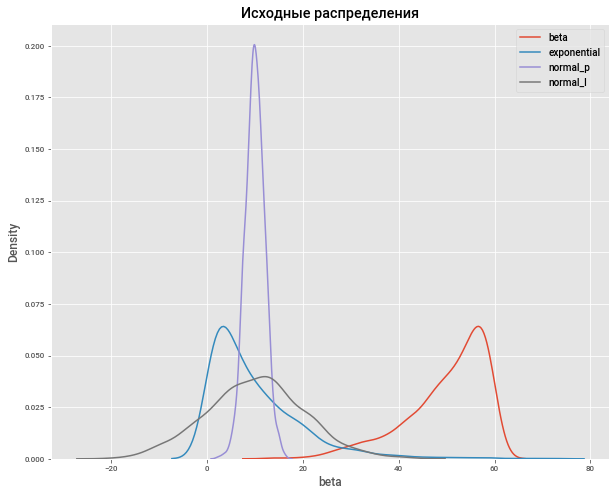

In [ ]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Исходные распределения')

# kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
sns.kdeplot(df['beta'], ax=ax1, label ='beta')
sns.kdeplot(df['exponential'], ax=ax1, label ='exponential')
sns.kdeplot(df['normal_p'], ax=ax1, label ='normal_p')
sns.kdeplot(df['normal_l'], ax=ax1, label ='normal_l')
plt.legend()

In [ ]:
df.describe()

beta  exponential     normal_p     normal_l
count  1000.000000  1000.000000  1000.000000  1000.000000
mean     50.024249    10.028387     9.994006    10.175745
std       8.474545     9.733928     2.013971    10.104004
min      13.854022     0.007617     2.356844   -19.539980
25%      45.793283     2.951421     8.687478     3.566822
50%      52.337504     7.018565     9.983498    10.326331
75%      56.722191    14.022485    11.306914    16.615057
max      59.990640    71.344341    16.214364    42.072915

<AxesSubplot:title={'center':'После нормализации MinMaxScaler'}, xlabel='beta', ylabel='Density'>

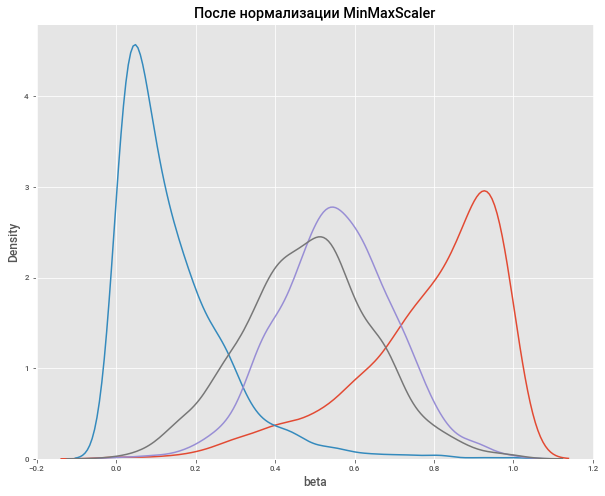

In [ ]:
# инициализируем нормализатор MinMaxScaler
mm_scaler = preprocessing.MinMaxScaler()

# копируем исходный датасет
df_mm = mm_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_mm = pd.DataFrame(df_mm, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('После нормализации MinMaxScaler')

sns.kdeplot(df_mm['beta'], ax=ax1)
sns.kdeplot(df_mm['exponential'], ax=ax1)
sns.kdeplot(df_mm['normal_p'], ax=ax1)
sns.kdeplot(df_mm['normal_l'], ax=ax1)

<AxesSubplot:title={'center':'Распределения после RobustScaler'}, xlabel='beta', ylabel='Density'>

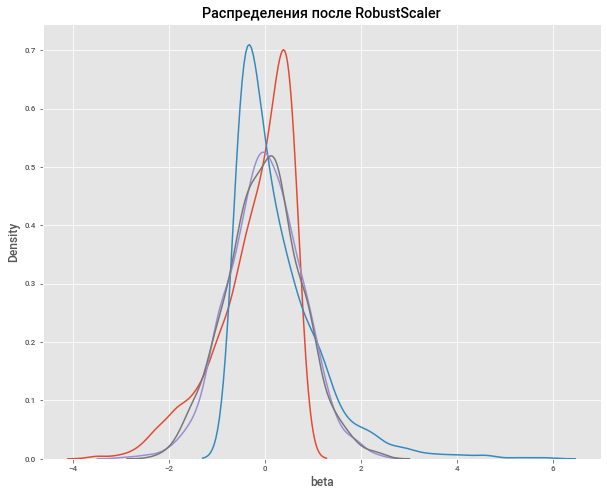

In [ ]:
r_scaler = preprocessing.RobustScaler()

# копируем исходный датасет
df_r = r_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_r = pd.DataFrame(df_r, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после RobustScaler')

sns.kdeplot(df_r['beta'], ax=ax1)
sns.kdeplot(df_r['exponential'], ax=ax1)
sns.kdeplot(df_r['normal_p'], ax=ax1)
sns.kdeplot(df_r['normal_l'], ax=ax1)

<AxesSubplot:title={'center':'Распределения после StandardScaler'}, xlabel='beta', ylabel='Density'>

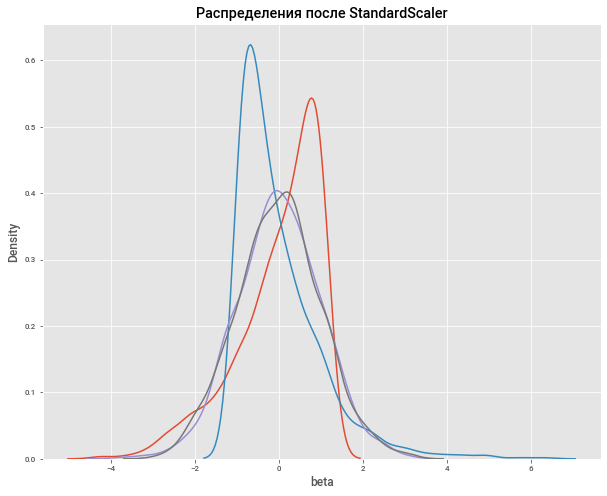

In [ ]:
# инициализируем стандартизатор StandardScaler
s_scaler = preprocessing.StandardScaler()

# копируем исходный датасет
df_s = s_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_s = pd.DataFrame(df_s, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после StandardScaler')

sns.kdeplot(df_s['beta'], ax=ax1)
sns.kdeplot(df_s['exponential'], ax=ax1)
sns.kdeplot(df_s['normal_p'], ax=ax1)
sns.kdeplot(df_s['normal_l'], ax=ax1)

In [ ]:
r_scaler = preprocessing.RobustScaler()

# копируем исходный датасет
data['price'] = r_scaler.fit_transform(pd.DataFrame(data['price']))
print(round(data['price'].sum()))

43501


In [ ]:
# инициализируем стандартизатор StandardScaler
s_scaler = preprocessing.StandardScaler()

# копируем исходный датасет
data['price'] = s_scaler.fit_transform(pd.DataFrame(data['price']))

In [ ]:
data['price'][129968]

-0.13551812448719305

In [ ]:
iris = pd.read_csv('iris.csv')
iris.head()

sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa

<AxesSubplot:>

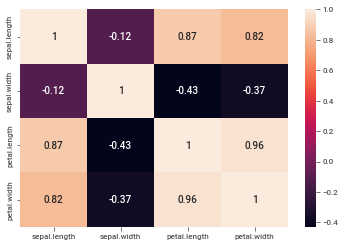

In [ ]:

sns.heatmap(iris.corr(), annot=True) # включаем отображение коэффициентов

In [ ]:
iris = iris.drop(['petal.width'], axis=1)
iris = iris.drop(['petal.length'], axis=1)

<AxesSubplot:>

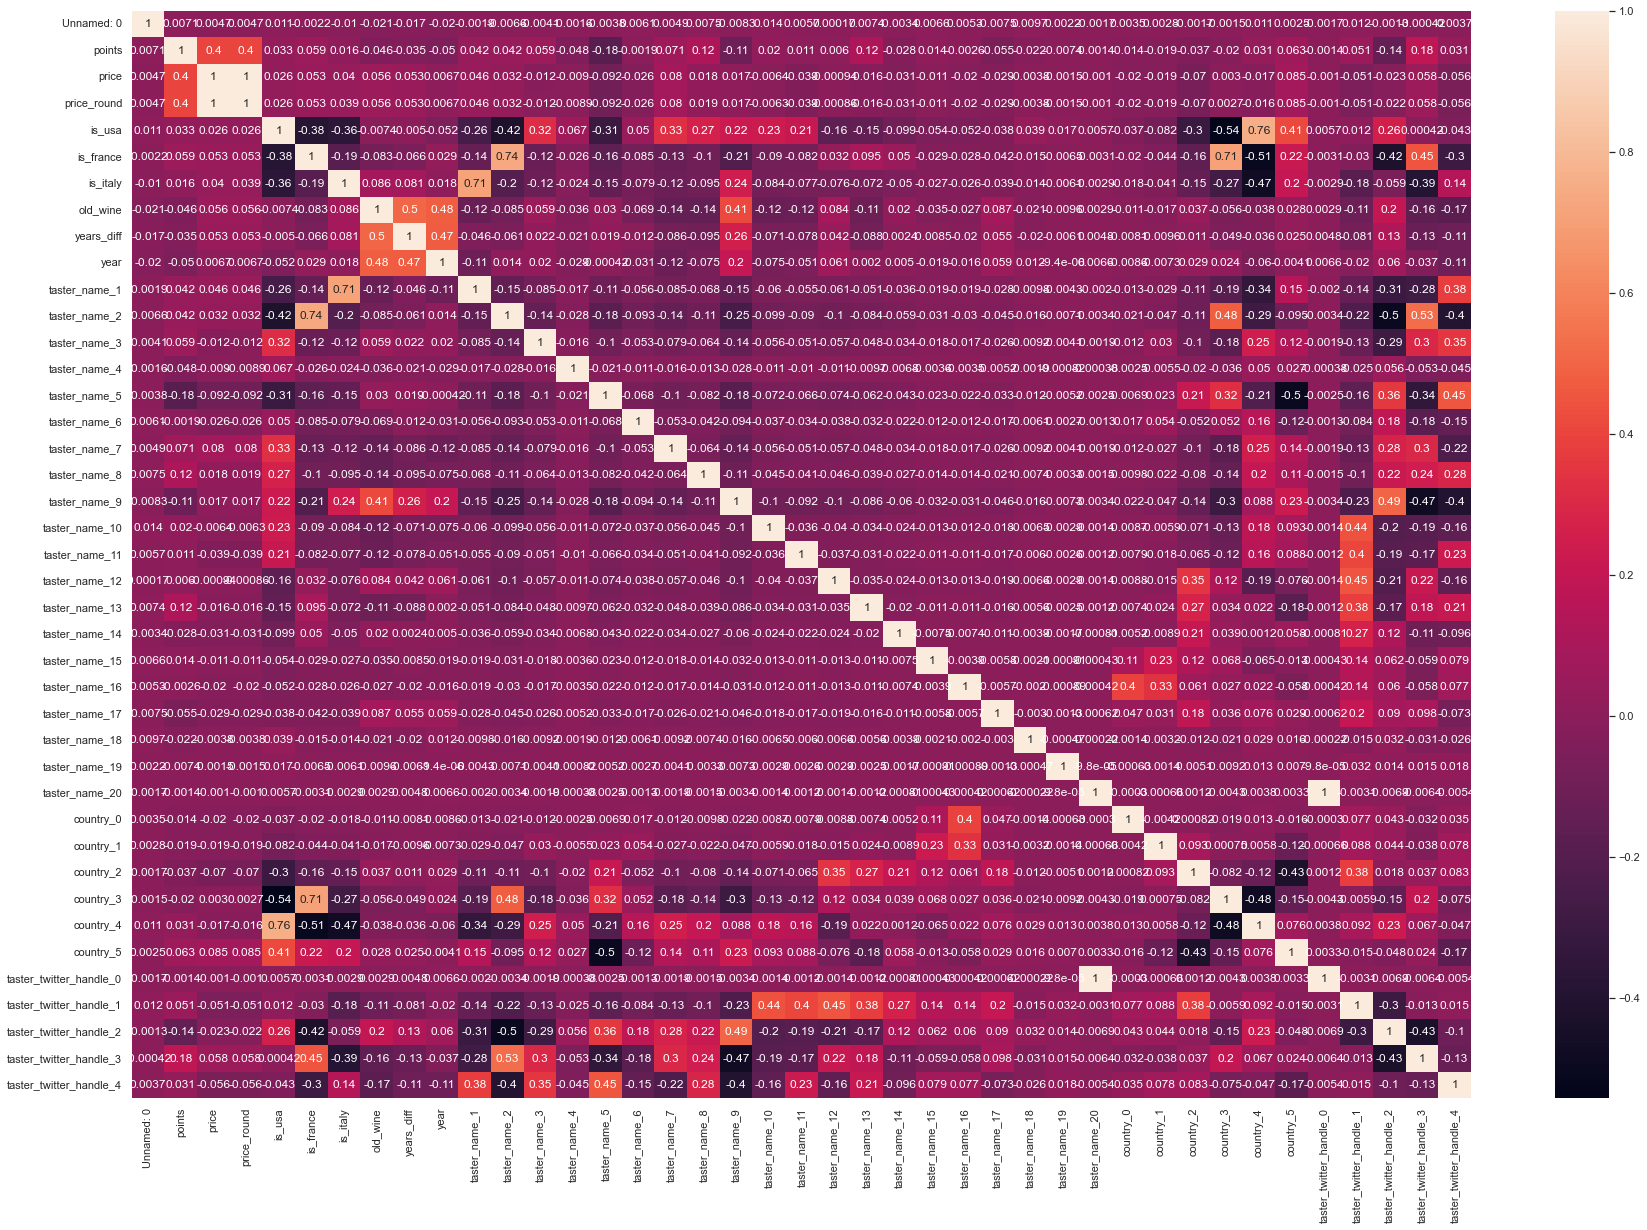

In [ ]:
sns.set(rc = {'figure.figsize':(30,20)})
sns.heatmap(data.corr(), annot=True) 


In [ ]:

data = data.drop(['price'], axis=1)

In [ ]:
data = data.drop(['country_3'], axis=1)
data = data.drop(['country_4'], axis=1)

KeyError: "['is_usa' 'is_france' 'is_italy' 'price_round' 'area'] not found in axis"

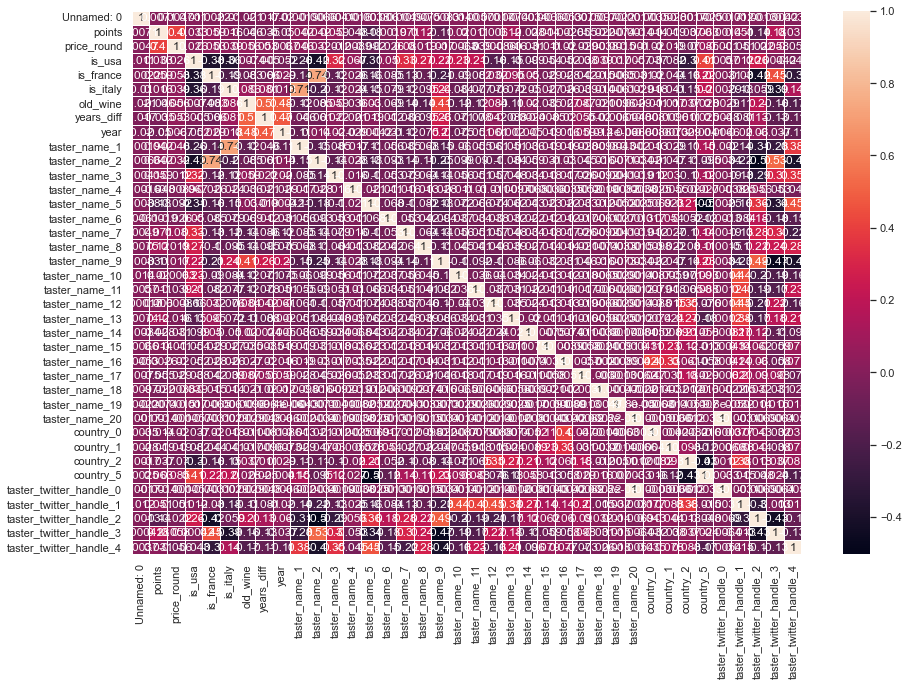

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, linewidths=.5, ax=ax)

# Удалим самые сильно скоррелированные пары
data = data.drop(['is_usa', 'is_france', 'is_italy', 'price_round', 'area'], axis=1)

# Проверяем, что сильно скоррелированных признаков не осталось
sns.heatmap(data.corr(), annot=True, linewidths=.5, ax=ax)

In [77]:
heart = pd.read_csv('heart.csv')
heart.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [78]:
heart['old'] = np.where(heart['age'] >60,1,0)
heart['old'].sum()

79

In [80]:
heart.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  old  
0   0     1       1    1  
1   0     2       1    0  
2   0     2       1    0  
3   0     2       1    0  
4   0     2       1    0

In [81]:
encoder = ce.OneHotEncoder(cols=['cp', 'restecg', 'slope', 'ca', 'thal'])
encoder_bin = encoder.fit_transform(heart[['cp', 'restecg', 'slope', 'ca', 'thal']])

heart = pd.concat([heart, encoder_bin], axis=1)

In [82]:
heart.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  ...  \
0   63    1   3       145   233    1        0      150      0      2.3  ...   
1   37    1   2       130   250    0        1      187      0      3.5  ...   
2   41    0   1       130   204    0        0      172      0      1.4  ...   
3   56    1   1       120   236    0        1      178      0      0.8  ...   
4   57    0   0       120   354    0        1      163      1      0.6  ...   

   slope_3  ca_1  ca_2  ca_3  ca_4  ca_5  thal_1  thal_2  thal_3  thal_4  
0        0     1     0     0     0     0       1       0       0       0  
1        0     1     0     0     0     0       0       1       0       0  
2        0     1     0     0     0     0       0       1       0       0  
3        0     1     0     0     0     0       0       1       0       0  
4        0     1     0     0     0     0       0       1       0       0  

[5 rows x 34 columns]

In [83]:
heart['trestbps_mean']=0
for i in heart.index:
    if heart['age'][i] <= 20 and heart['sex'][i] == 1:
        heart['trestbps_mean'][i] = 123
    if 20 < heart['age'][i] <= 30 and heart['sex'][i] == 1:
        heart['trestbps_mean'][i] = 126
    if 30 < heart['age'][i] <= 40 and heart['sex'][i] == 1:
        heart['trestbps_mean'][i] = 129
    if 40 < heart['age'][i] <= 50 and heart['sex'][i] == 1:
        heart['trestbps_mean'][i] = 135
    if 50 < heart['age'][i] <= 60 and heart['sex'][i] == 1:
        heart['trestbps_mean'][i] = 142
    if heart['age'][i] > 60 and heart['sex'][i] == 1:
        heart['trestbps_mean'][i] = 142
    if heart['age'][i] <= 20 and heart['sex'][i] == 0:
        heart['trestbps_mean'][i] = 116
    if 20 < heart['age'][i] <= 30 and heart['sex'][i] == 0:
        heart['trestbps_mean'][i] = 120
    if 30 < heart['age'][i] <= 40 and heart['sex'][i] == 0:
        heart['trestbps_mean'][i] = 127
    if 40 < heart['age'][i] <= 50 and heart['sex'][i] == 0:
        heart['trestbps_mean'][i] = 137
    if 50 < heart['age'][i] <= 60 and heart['sex'][i] == 0:
        heart['trestbps_mean'][i] = 144
    if heart['age'][i] > 60 and heart['sex'][i] == 0:
        heart['trestbps_mean'][i] = 159

heart['trestbps_mean'][300]

/var/folders/t6/jc5fqrkn0gv95ps21cwdcp340000gn/T/ipykernel_38647/982971744.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/t6/jc5fqrkn0gv95ps21cwdcp340000gn/T/ipykernel_38647/982971744.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/t6/jc5fqrkn0gv95ps21cwdcp340000gn/T/ipykernel_38647/982971744.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/t6/jc5fqrkn0gv95ps21cwdcp340000gn/T/ipykern

142

In [84]:
heart

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  ...  \
0     63    1   3       145   233    1        0      150      0      2.3  ...   
1     37    1   2       130   250    0        1      187      0      3.5  ...   
2     41    0   1       130   204    0        0      172      0      1.4  ...   
3     56    1   1       120   236    0        1      178      0      0.8  ...   
4     57    0   0       120   354    0        1      163      1      0.6  ...   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...  ...   
298   57    0   0       140   241    0        1      123      1      0.2  ...   
299   45    1   3       110   264    0        1      132      0      1.2  ...   
300   68    1   0       144   193    1        1      141      0      3.4  ...   
301   57    1   0       130   131    0        1      115      1      1.2  ...   
302   57    0   1       130   236    0        0      174      0      0.0  ...   

     ca_1  ca_2  ca_3  ca_4  ca_5  thal_1  thal_2  thal_3  thal_4  \
0       1     0     0     0     0       1       0       0       0   
1       1     0     0     0     0       0       1       0       0   
2       1     0     0     0     0       0       1       0       0   
3       1     0     0     0     0       0       1       0       0   
4       1     0     0     0     0       0       1       0       0   
..    ...   ...   ...   ...   ...     ...     ...     ...     ...   
298     1     0     0     0     0       0       0       1       0   
299     1     0     0     0     0       0       0       1       0   
300     0     1     0     0     0       0       0       1       0   
301     0     0     1     0     0       0       0       1       0   
302     0     0     1     0     0       0       1       0       0   

     trestbps_mean  
0              142  
1              129  
2              137  
3              142  
4              144  
..             ...  
298            144  
299            135  
300            142  
301            142  
302            144  

[303 rows x 35 columns]

In [96]:
# для нормализации, стандартизации
from sklearn import preprocessing

# Для графиков
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# инициализируем нормализатор RobustScaler
# для нормализации, стандартизации
from sklearn import preprocessing

# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()
col_names = list(heart.columns)

# копируем исходный датасет
heart_r = r_scaler.fit_transform(heart)

heart_r = pd.DataFrame(heart_r, columns=col_names)

# смотрим описательные статистики, ответ 0.816232
heart_r.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    -0.046938   -0.316832   -0.016502    0.081188    0.098646    0.148515   
std      0.672748    0.466011    0.516026    0.876907    0.816232    0.356198   
min     -1.925926   -1.000000   -0.500000   -1.800000   -1.795276    0.000000   
25%     -0.555556   -1.000000   -0.500000   -0.500000   -0.456693    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.444444    0.000000    0.500000    0.500000    0.543307    0.000000   
max      1.629630    0.000000    1.000000    3.500000    5.102362    1.000000   

          restecg     thalach       exang     oldpeak  ...        ca_1  \
count  303.000000  303.000000  303.000000  303.000000  ...  303.000000   
mean    -0.471947   -0.103173    0.326733    0.149752  ...   -0.422442   
std      0.525860    0.704774    0.469794    0.725672  ...    0.494765   
min     -1.000000   -2.523077    0.000000   -0.500000  ...   -1.000000   
25%     -1.000000   -0.600000    0.000000   -0.500000  ...   -1.000000   
50%      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
75%      0.000000    0.400000    1.000000    0.500000  ...    0.000000   
max      1.000000    1.507692    1.000000    3.375000  ...    0.000000   

             ca_2        ca_3        ca_4        ca_5      thal_1      thal_2  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.125413    0.214521    0.066007    0.016502    0.059406   -0.452145   
std      0.331734    0.411169    0.248704    0.127605    0.236774    0.498528   
min      0.000000    0.000000    0.000000    0.000000    0.000000   -1.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000   -1.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    0.000000   

           thal_3      thal_4  trestbps_mean  
count  303.000000  303.000000     303.000000  
mean     0.386139    0.006601      -0.066007  
std      0.487668    0.081110       1.487564  
min      0.000000    0.000000      -3.200000  
25%      0.000000    0.000000      -1.000000  
50%      0.000000    0.000000       0.000000  
75%      1.000000    0.000000       0.000000  
max      1.000000    1.000000       3.400000  

[8 rows x 35 columns]

<AxesSubplot: >

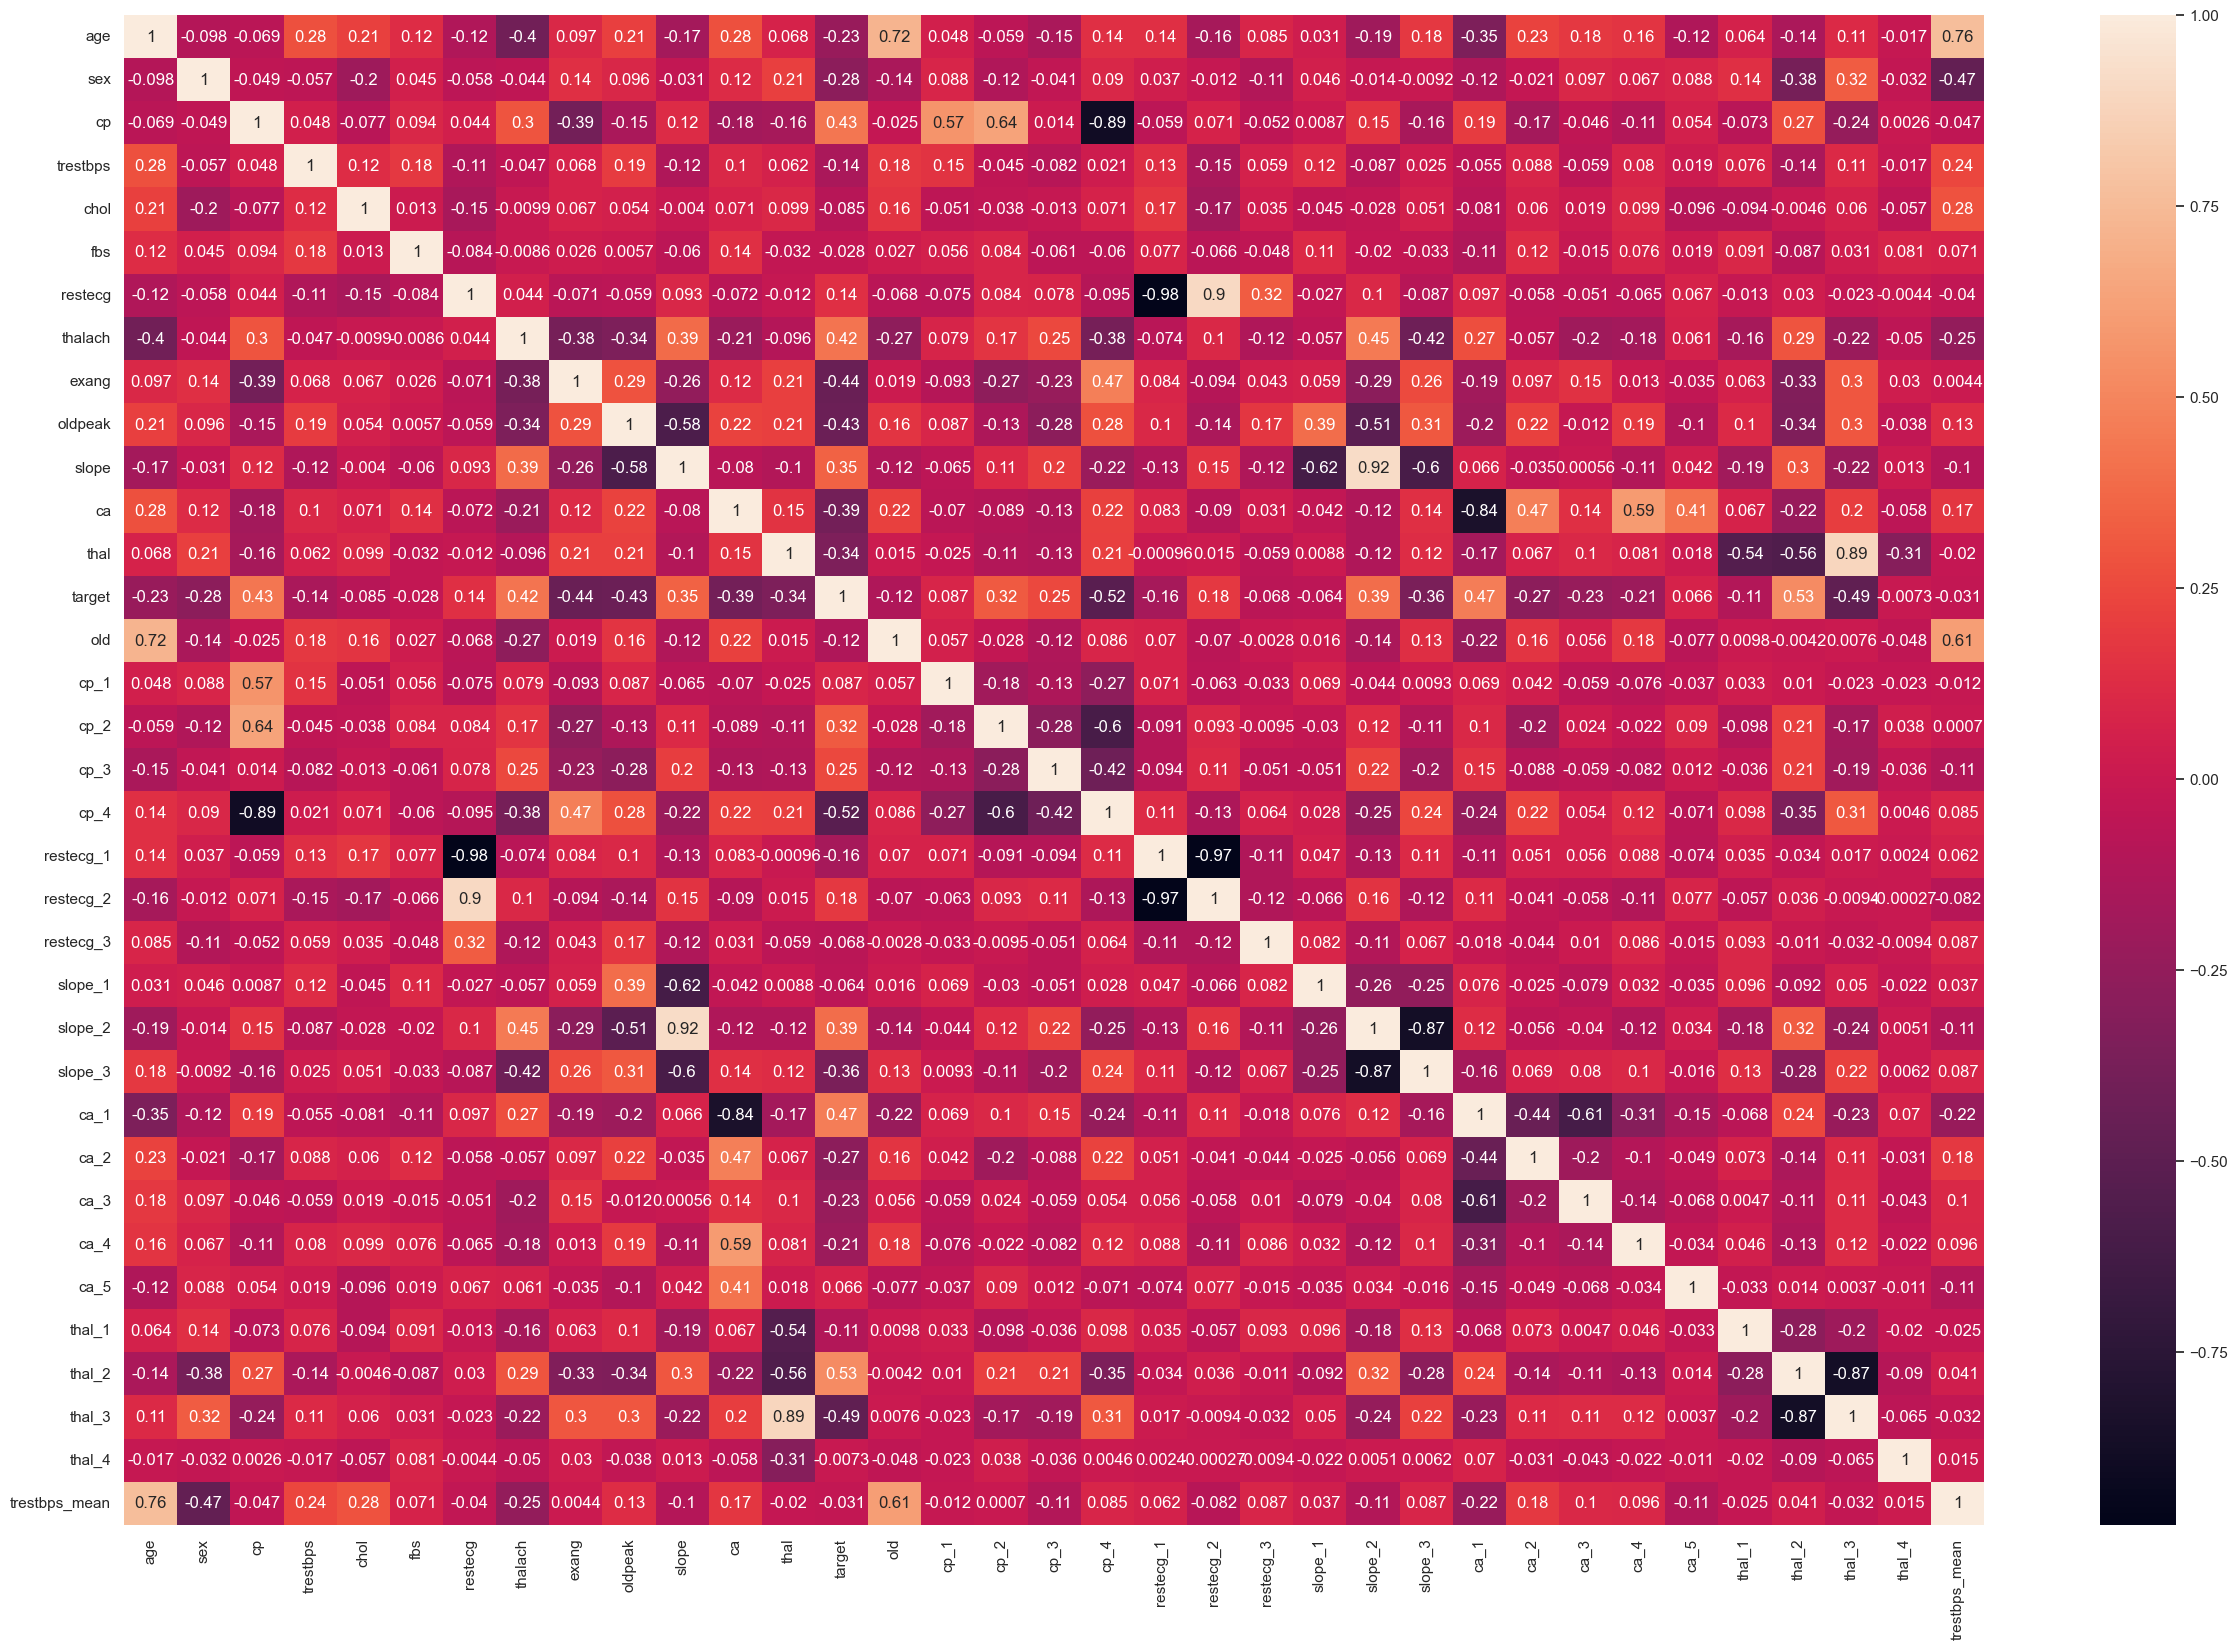

In [97]:
sns.set(rc = {'figure.figsize':(30,20)})
sns.heatmap(heart.corr(), annot=True) 